<b>This notebook divide a single mailing list corpus into threads.</b> 

What it does:
-identifies the more participated threads
-identifies the long lasting threads
-export each thread's emails into seperate .csv files, setting thresholds of participation and duration

Parameters to set options:
-set a single URL related to a mailing list, setting the 'url' variable
-it exports files in the file path specified in the variable ‘path’
-you can set a threshold of participation and of duration for the threads to export, by setting 'min_participation' and 'min_duration' variables

In [1]:
from bigbang.archive import Archive
from bigbang.archive import load as load_archive
from bigbang.thread import Thread
from bigbang.thread import Node
from bigbang.utils import remove_quoted
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import csv
from collections import defaultdict
import os

First, collect data from a public email archive.

In [2]:
# Insert a list of archive names
archives_names = ["ietf"]

cwd = os.getcwd()

archives_paths = list()
for archive_name in archives_names:
    archives_paths.append("../../archives/" + archive_name + ".csv")


archives_list = [load_archive(archive_path).data for archive_path in archives_paths]

archives = Archive(pd.concat(archives_list))

archives_data = archives.data

Let's check the number of threads in this mailing list corpus

In [3]:
print(len(archives.get_threads()))

24782


We can  plot the number of people participating in each thread.

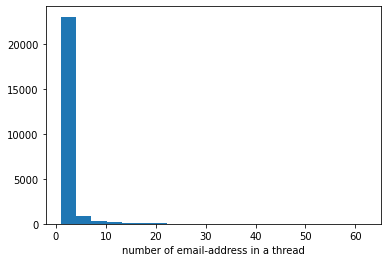

In [4]:
n_people = [t.get_num_people() for t in archives.get_threads()]

plt.hist(n_people, bins=20)
plt.xlabel("number of email-address in a thread")
plt.show()

The *duration* of a thread is the amount of elapsed time between its first and last message. 

Let's plot the number of threads per each number of days of duration


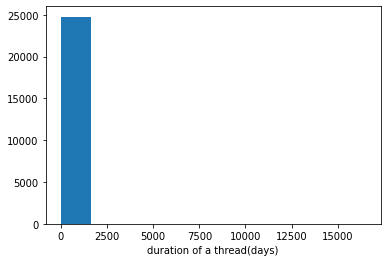

In [5]:
duration = [t.get_duration().days for t in archives.get_threads()]

plt.hist(duration, bins=(10))
plt.xlabel("duration of a thread(days)")
plt.show()

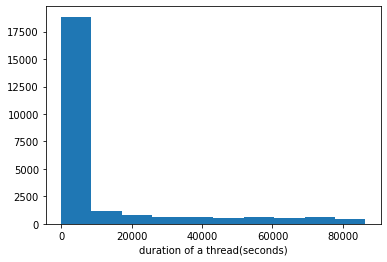

In [10]:
y = [t.get_duration().seconds for t in archives.get_threads()]

plt.hist(y, bins=(10))
plt.xlabel("duration of a thread(seconds)")
plt.show()

You can examine the content of threads like so:

In [14]:
# Insert the participation threshold (number of people)
# (for no threeshold: 'min_participation = 0')
min_participation = 0

# Insert the duration threshold (number of days)
# (for no threeshold: 'min_duration = 0')
min_duration = 0

i = 0
for thread in arx.get_threads():
    if (
        thread.get_num_people() >= min_participation
        and thread.get_duration().days >= min_duration
    ):
        i += 1
        f = open(cwd + "/thread_" + str(i) + ".csv", "wb")
        f_w = csv.writer(f)
        f_w.writerow(thread.get_content())
        f.close()